# Tache 7

In [96]:
import numpy as np
import itertools
from matplotlib import pyplot as plt
from mp_api.client import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.core import Spin
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [97]:
# HfNiSn
mp_key = "fnNhNeZr2KXTJ64m73UhQ93prbDkSyqH"
mp_id = "mp-924128"

In [98]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    band = m.get_bandstructure_by_material_id(mp_id)


## Bande interdite

Info over Band gap :
 {'direct': False, 'energy': 0.3868999999999998, 'transition': '\\Gamma-X'} 

Energy value :
 0.3868999999999998 [eV]

On voit grace à la valeur de l'énergie de la bande interdite que le matériau est un semi-conducteur. On voit aussi que la bande de conduction (en gris sur le plot) est de largeur moyenne, typique d'un semi-conducteur.


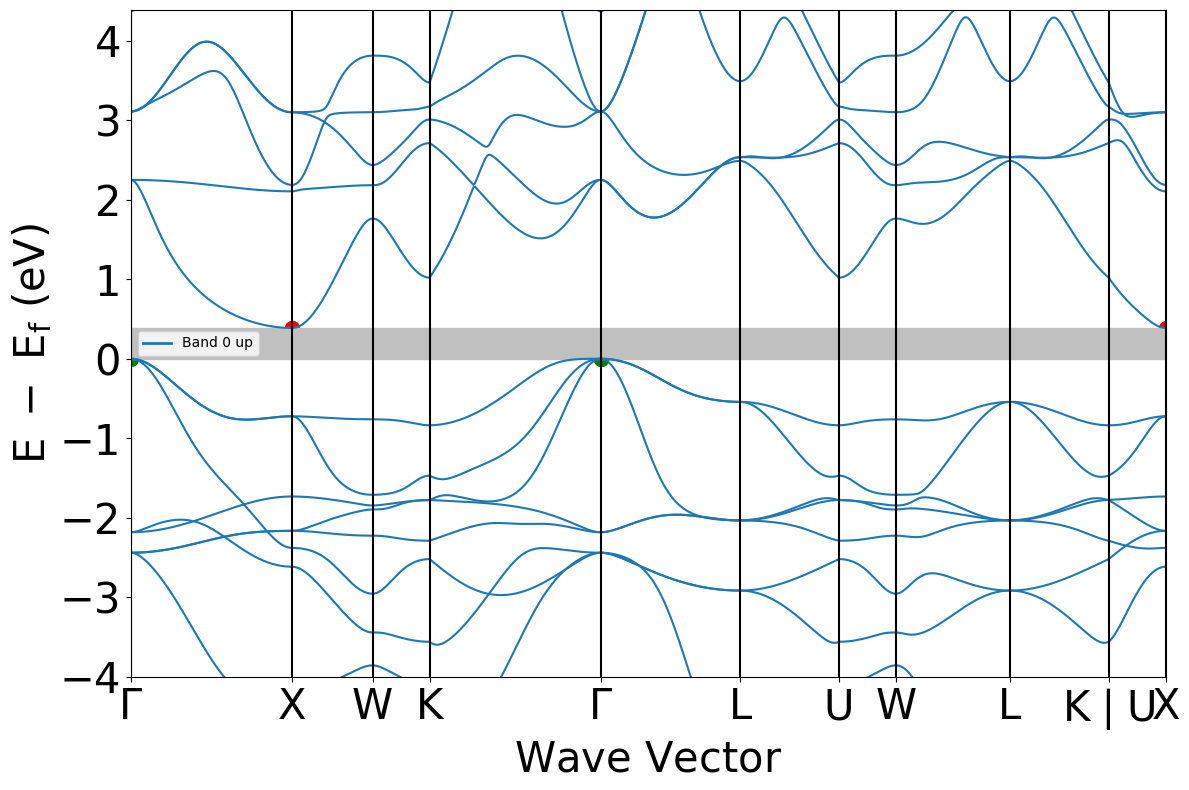

In [99]:
#Infos
gap = band.get_band_gap()
print("Info over Band gap :\n", gap, "\n")

#Energy
gap_energy = gap['energy']
print("Energy value :\n", gap_energy, "[eV]\n")
print("On voit grace à la valeur de l'énergie de la bande interdite que le matériau est un semi-conducteur. On voit aussi que la bande de conduction (en gris sur le plot) est de largeur moyenne, typique d'un semi-conducteur.")

#Plot
bsplot = BSPlotter(band)
plot_data = BSPlotter(band).bs_plot_data()
data = plot_data.get('ticks').get('distance')
bsplot.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(data[0], data[-1], 400), 0, gap_energy, color = 'silver')

## Dernière bande de valence

In [100]:
Energy_valence = band.get_vbm()['energy']
print("Energie de la dernière bande de valence :", Energy_valence, "[eV]")
Numero_valence = band.get_vbm()['band_index'][Spin.up][2]
print("Numéro de la dernière bande de valence :", Numero_valence)

Energie de la dernière bande de valence : 6.9878 [eV]
Numéro de la dernière bande de valence : 19


## Première bande de conduction

In [101]:
Energy_conduction = band.get_cbm()['energy']
print("Energie de la dernière bande de conduction :", Energy_conduction, "[eV]")
Numero_conduction = band.get_cbm()['band_index'][Spin.up][0]
print("Numéro de la dernière bande de conduction :", Numero_conduction)

Energie de la dernière bande de conduction : 7.3747 [eV]
Numéro de la dernière bande de conduction : 20


## Direction de dispertion

La pente qui correspond à la dispersion maximale de la dernière bande de valence vaut 0.7680408020710267 , 
sa direction est K ( 3 ) vers Γ ( 4 ). (en bleu sur le graphe)


La pente qui correspond à la dispersion minimale de la dernière bande de valence vaut -0.7044688403415714 , 
sa direction est Γ ( 0 ) vers X ( 1 ). (en rouge sur le graphe)


La pente qui correspond à la dispersion maximale de la première bande de conduction vaut 2.679686971632197 , 
sa direction est X ( 1 ) vers W ( 2 ). (en jaune sur le graphe)


La pente qui correspond à la dispersion minimale de la première bande de conduction vaut -2.3341579544098168 , 
sa direction est L ( 8 ) vers K|U ( 9 ). (en vert sur le graphe)




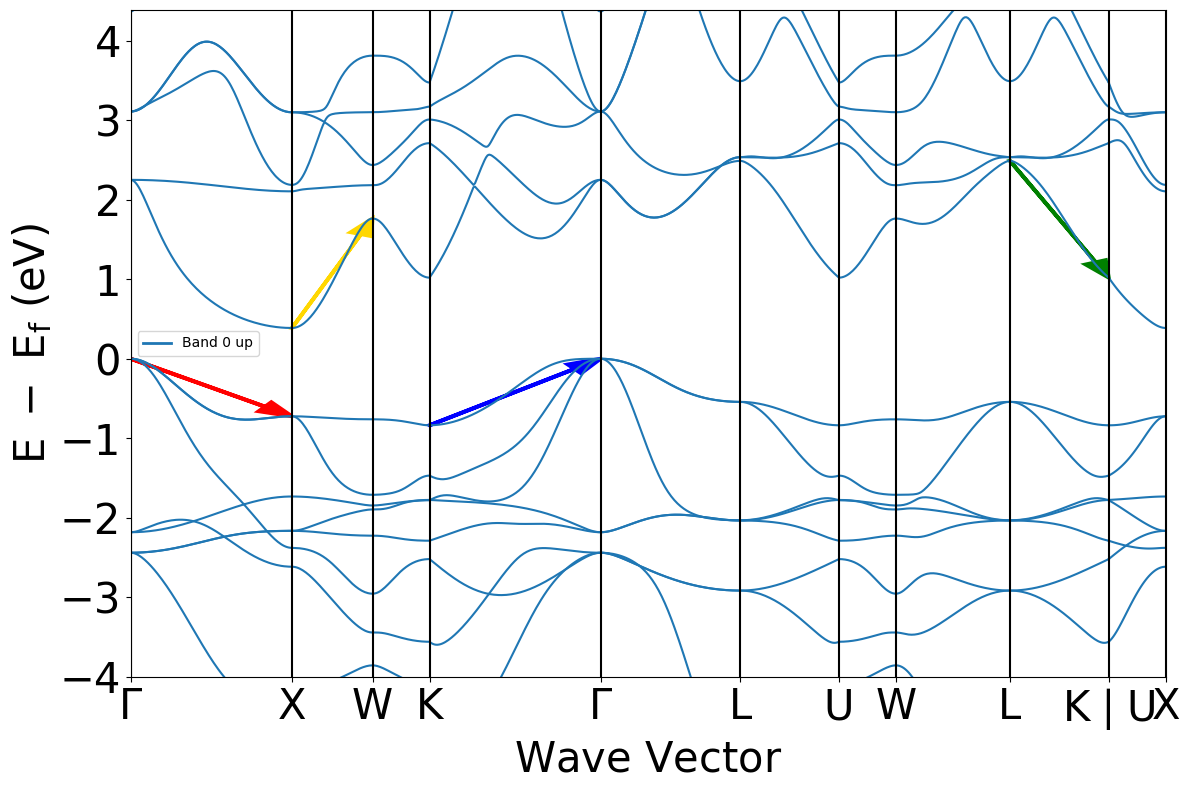

In [102]:
a_vector = np.unique(data) 
bands_energies = plot_data['energy']['1'] 

valence_dispertion = np.zeros(10)
conduction_dispertion = np.zeros(10)

for i in range(10):
    diff_absc= a_vector[i+1]-a_vector[i]
    valence_dispertion[i] = (bands_energies[i][num_val][-1] - bands_energies[i][num_val][0]) / diff_absc
    conduction_dispertion[i] = (bands_energies[i][num_cond][-1] - bands_energies[i][num_cond][0]) / diff_absc
    

print("La pente qui correspond à la dispersion maximale de la dernière bande de valence vaut" , valence_dispertion[np.argmax(valence_dispertion)] ,
      ", \nsa direction est K (" ,np.argmax(valence_dispertion), ") vers Γ (" ,np.argmax(valence_dispertion)+1, "). (en bleu sur le graphe)")
print("\n")
print("La pente qui correspond à la dispersion minimale de la dernière bande de valence vaut" , valence_dispertion[np.argmin(valence_dispertion)] ,
      ", \nsa direction est Γ (" ,np.argmin(valence_dispertion), ") vers X (" ,np.argmin(valence_dispertion)+1, "). (en rouge sur le graphe)")
print("\n")
print("La pente qui correspond à la dispersion maximale de la première bande de conduction vaut" , conduction_dispertion[np.argmax(conduction_dispertion)] ,
      ", \nsa direction est X (" ,np.argmax(conduction_dispertion), ") vers W (" ,np.argmax(conduction_dispertion)+1, "). (en jaune sur le graphe)")
print("\n")
print("La pente qui correspond à la dispersion minimale de la première bande de conduction vaut" , conduction_dispertion[np.argmin(conduction_dispertion)] ,
      ", \nsa direction est L (" ,np.argmin(conduction_dispertion), ") vers K|U (" ,np.argmin(conduction_dispertion)+1, "). (en vert sur le graphe)")
print("\n")

bsp.get_plot()
plt.arrow(a_vector[1], bands_energies[1][num_cond][0], a_vector[2]-a_vector[1],bands_energies[1][num_cond][-1] - bands_energies[1][num_cond][0] , color = 'gold', head_width = 0.14, linewidth=2.8, length_includes_head=True) 
plt.arrow(a_vector[8], bands_energies[8][num_cond][0], a_vector[9]-a_vector[8],bands_energies[8][num_cond][-1] - bands_energies[8][num_cond][0] , color = 'g', head_width = 0.14, linewidth=2.8, length_includes_head=True) 
plt.arrow(a_vector[3], bands_energies[3][num_val][0], a_vector[4]-a_vector[3],bands_energies[3][num_val][-1] - bands_energies[3][num_val][0] ,color = 'b',head_width = 0.14, linewidth=2.8, length_includes_head=True) 
plt.arrow(a_vector[0], bands_energies[0][num_val][0], a_vector[1]-a_vector[0],bands_energies[0][num_val][-1] - bands_energies[0][num_val][0] , color = 'r', head_width = 0.14, linewidth=2.8, length_includes_head=True) 
plt.show()

## Masse effective au sommet de la dernière bande de valence

In [103]:
h = 6.62607015e-34 
eV = 1.6022e-19
h_bar = h/(2*np.pi)

k_valence = band.get_vbm()['kpoint'].frac_coords*1e10

masse_valence = (h_bar**2 * (k_valence[0]**2+k_valence[1]**2+k_valence[2]**2))/(2*abs(Energy_valence)*eV)
print('La masse effective au sommet de la dernière bande de valence vaut ' + str(masse_valence)+' [kg]\n')

La masse effective au sommet de la dernière bande de valence vaut 0.0 [kg]



## Masse effective à la base de la première bande de conduction

In [104]:
h = 6.62607015e-34 
eV = 1.6022e-19
h_bar = h/(2*np.pi)

k_conduction = band.get_cbm()['kpoint'].frac_coords*1e10

masse_conduction = (h_bar**2 * (k_conduction[0]**2+k_conduction[1]**2+k_conduction[2]**2))/(2*(Energy_conduction)*eV)
print('La masse effective à la base de la première bande de conduction vaut ' + str(masse_conduction)+' [kg]\n')

La masse effective à la base de la première bande de conduction vaut 2.35305048622421e-31 [kg]

